In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

root = Path("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/")
# root = Path("/mnt/ssd-1/alexm/w2s/results/sciq_support_contains/")

In [16]:
# all subdirectories of the form `run_name`*
title = "Amazon Polarity \"look at title only\" multiple oracle epochs with active learning"
# title = "Sciq with support \"does context contain `ans`\""
suffix = "_active5"
data = []
configs = []
subdirs = [
    f"am_title_0{suffix}",
    f"am_title_32x48{suffix}",
    # f"am_title_128x12{suffix}",
    f"am_title_512{suffix}",
    f"am_title_512x4{suffix}",
    # f"am_title_2000{suffix}",
    # f"am_title_2000x4{suffix}",
    f"am_title_8000{suffix}",
    # "am_title_0_orepoch",
    # "am_title_32x48_orepoch",
    # "am_title_128x12_orepoch",
    # "am_title_512_orepoch",
    # "am_title_512x4_orepoch",
    # "am_title_2000_orepoch",
    # "am_title_2000x4_orepoch",
    # "am_title_8000_orepoch",
    # "am_title_0_matching",
    # "am_title_32x48_matching",
    # "am_title_128x12_matching",
    # "am_title_512_matching",
    # "am_title_512x4_matching",
    # "am_title_2000_matching",
    # "am_title_2000x4_matching",
    # "am_title_8000_matching",
    # "ss_contains_0",
    # "ss_contains_32x48",
    # "ss_contains_128x12",
    # "ss_contains_512",
    # "ss_contains_512x4",
    # "ss_contains_2000",
    # "ss_contains_2000x4",
    # "ss_contains_8000",
    # 'am_title_0',
    # 'am_title_32x48',
    # 'am_title_128x12',
    # 'am_title_512',
    # 'am_title_512x4',
    # 'am_title_2000',
    # 'am_title_2000x4',
    # 'am_title_8000',
]

names = []
for name in subdirs:
    d = root / name
    # df = pd.read_json(d / "results.json", orient="records", lines=True)
    dicts = []
    for fname in d.glob("results_*.json"):
        with open(fname) as f:
            dicts.append(json.load(f))
    if len(dicts) == 0:
        continue
    df = pd.DataFrame(dicts).sort_values("num_oracle")
    # with open(d / "config.json") as f:
    #     config = json.load(f)
    data.append(df)
    names.append(name)
    # configs.append(config)


In [17]:
data[3]

,auroc,acc,auroc_against_weak,acc_against_weak,weak_soft_labels,num_weak,num_oracle,oracle_ids,ids,calibrated_logodds,gt_soft_labels
1,0.973069,0.909667,0.957766,0.894000,"[0.7732163667678833, 0.3081902265548706, 0.234...",512,0,[],"[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[1.46484375, 0.66015625, -1.171875, -0.9355468...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
6,0.946916,0.892667,0.917101,0.857667,"[0.7732163667678833, 0.3081902265548706, 0.234...",512,4,"[73c71773, 76399894, ec929527, 66f6e8c4]","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[7.609375, 6.046875, -7.671875, -7.765625, 7.3...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
5,0.972368,0.939667,0.930360,0.882000,"[0.7732163667678833, 0.3081902265548706, 0.234...",512,16,"[b87ff9e3, ff45f70f, 919002b7, a7537d9f, ec929...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[9.46875, 8.28125, -9.40625, -9.3125, 9.125, -...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
4,0.974857,0.949333,0.902614,0.875667,"[0.7732163667678833, 0.3081902265548706, 0.234...",512,64,"[f78780e4, 6d216d42, 61e958c4, ff45f70f, 779f1...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[11.96875, 11.875, -11.96875, -12.34375, 11.43...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
0,0.990924,0.969667,0.909361,0.855333,"[0.7732163667678833, 0.3081902265548706, 0.234...",512,256,"[6d216d42, b7f7ade2, 1b0207bd, 9fa0af2d, 0be6c...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[9.65625, 9.625, -10.46875, -10.5625, 9.1875, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
3,0.994449,0.974333,0.926064,0.856000,"[0.7732163667678833, 0.3081902265548706, 0.234...",512,1024,"[6d216d42, fdd38368, 59b85280, 53718ef9, d9327...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[7.359375, 5.6875, -7.203125, -6.59375, 6.4531...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
2,0.994970,0.978333,0.917367,0.853333,"[0.7732163667678833, 0.3081902265548706, 0.234...",512,4096,"[01507870, 59b85280, 2094588b, 15a01ada, dc721...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[7.03125, 6.078125, -6.4375, -5.53125, 6.375, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."


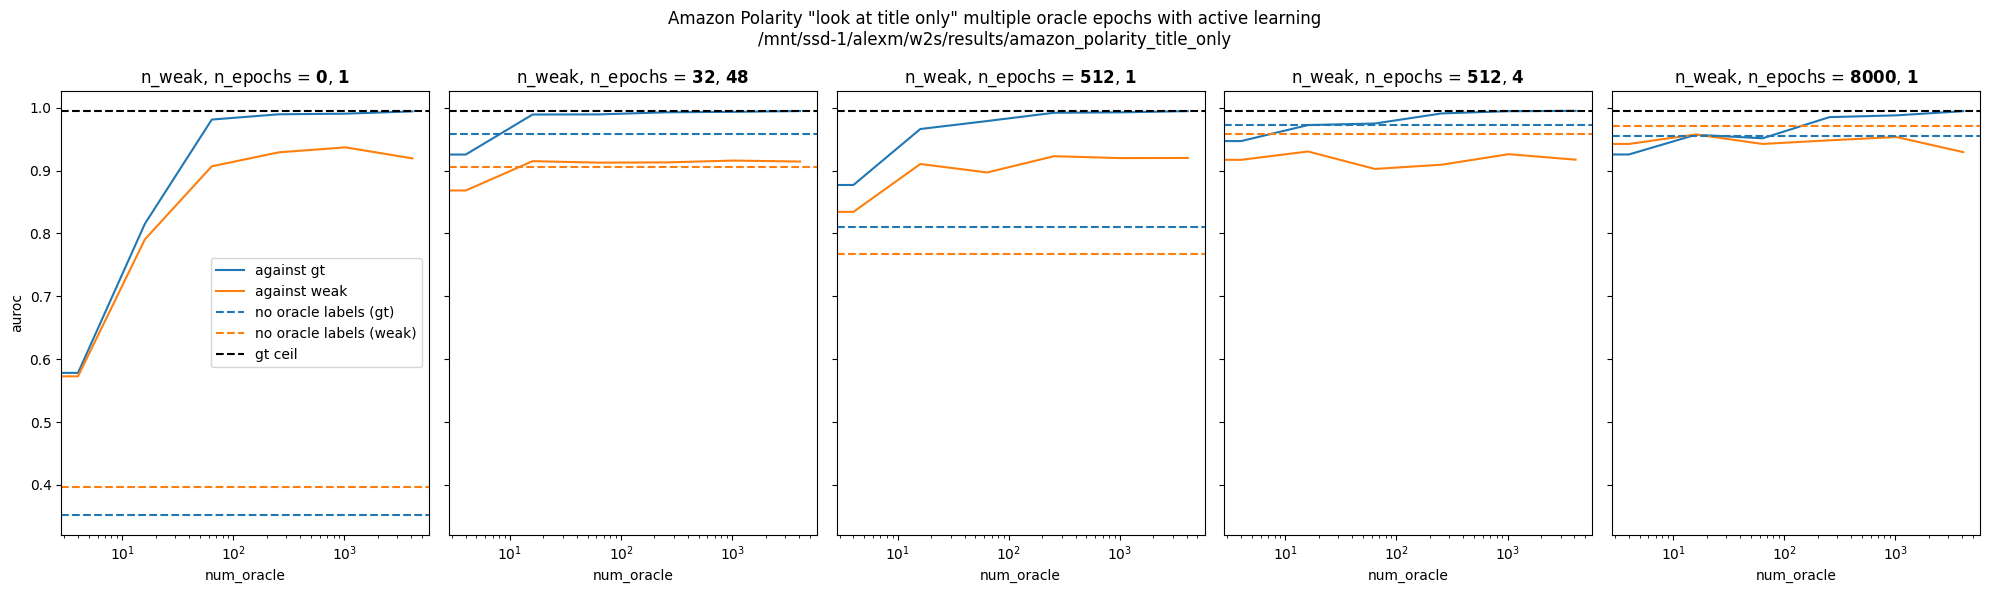

In [18]:
# I want a horizontal grid of aligned subplots, one for each n_weak, with x-axis=n_oracle, and y_axis=auroc

rows, cols = 1, 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 6), sharey=True, sharex=True)
metric = "auroc"
for i, (df, name) in enumerate(zip(data, names)):
    if i == 0:
        gt_ceil = df[metric].max()
    ax = axs[i // cols, i % cols] if rows > 1 else axs[i % cols]
    plt.sca(ax)
    sns.lineplot(x="num_oracle", y=metric, data=df, label="against gt" if i == 0 else None)
    sns.lineplot(x="num_oracle", y=f"{metric}_against_weak", data=df, label="against weak" if i == 0 else None)
    # horizontal lines for num_oracle = 0
    zero_row = df[df["num_oracle"] == 0]
    ax.axhline(zero_row[metric].values[0], color="tab:blue", linestyle="--", label="no oracle labels (gt)" if i == 0 else None)
    ax.axhline(zero_row[f"{metric}_against_weak"].values[0], color="tab:orange", linestyle="--", label="no oracle labels (weak)" if i == 0 else None)
    ax.axhline(gt_ceil, color="black", linestyle="--", label="gt ceil" if i == 0 else None)
    if i == 0:
        plt.legend()

    last = name.split("_")[-2]
    if "x" in last:
        n_weak, n_epochs =last.split("x")
    else:
        n_weak = last
        n_epochs = "1"

    plt.title("n_weak, n_epochs = $\mathbf{" + n_weak + "}$, $\mathbf{" + n_epochs + "}$")
    plt.semilogx()
    plt.xlabel("num_oracle")
    plt.ylabel(metric)

plt.suptitle(f"{title}\n{root}/*{suffix}")
plt.tight_layout()
plt.show()